# Object Detection

24505063 Assignment 2

### Step 1. Import the required packages


In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras import models
from keras import layers
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras import models, layers, regularizers
import matplotlib.pyplot as plt
import glob as glob
import cv2
from PIL import Image
%matplotlib inline



Mount the Google Drive:


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Change to dataset directory for Faster-RCNN (Change this directory to dataset used for Faster-RCNN)

In [3]:
%cd /content/gdrive/MyDrive/42028/Assignment2/dataset_42028assg2_24505063/Object_Detection/pascal

/content/gdrive/MyDrive/42028/Assignment2/dataset_42028assg2_24505063/Object_Detection/pascal


Clone FasterRCNN model

In [ ]:
!git clone https://github.com/nabinsharmaUTS/ObjectDetection-FasterRCNN.git

fatal: destination path 'ObjectDetection-FasterRCNN' already exists and is not an empty directory.


Change directory to cloned git folder


In [ ]:
%cd ObjectDetection-FasterRCNN/

/content/gdrive/MyDrive/42028/Assignment2/dataset_42028assg2_24505063/Object_Detection/pascal/ObjectDetection-FasterRCNN


Install the dependencies for Faster-RCNN

In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.4/952.4 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.3/277.3 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 12.7 MB/s eta 0:00:00
  Attempting uninstall: 

### Step 2. Load Dataset

Change path to the folder contianing model and dataset (Change this path to dataset used for Faster-RCNN training)

In [4]:
%cd /content/gdrive/MyDrive/42028/Assignment2/dataset_42028assg2_24505063/Object_Detection/pascal

/content/gdrive/MyDrive/42028/Assignment2/dataset_42028assg2_24505063/Object_Detection/pascal


Define the data.yaml file used by Faster-RCNN to locate and parse training datasets

In [ ]:
%%writefile data.yaml
# Images and labels direcotry should be relative to train.py
TRAIN_DIR_IMAGES: 'train'
TRAIN_DIR_LABELS: 'train'
VALID_DIR_IMAGES: 'valid'
VALID_DIR_LABELS: 'valid'
TEST_DIR_IMAGES: 'test'
TEST_DIR_LABELS: 'test'

# Class names.
CLASSES: ['__background__', 'Ready', 'empty_pod', 'germination', 'pod', 'young']

# Number of classes (object classes + 1 for background class in Faster RCNN).
NC: 6

# Whether to save the predictions of the validation set while training.
SAVE_VALID_PREDICTION_IMAGES: True
SAVE_INVALID_PREDICTION_IMAGES: True

Writing data.yaml


### 3. Train Faster-RCNN


Disable weights and biases tool

In [ ]:
!wandb disabled

W&B disabled.


Train the model for 100 epochs with a batch size of 2 (Note all random seeds have been set to 24505063, change directory to desired starting state of model)

In [ ]:
!python ObjectDetection-FasterRCNN/train.py --config data.yaml --epochs 100 --model fasterrcnn_resnet50_fpn_v2 --project-name lettuce --batch-size 2 --no-mosaic --seed 24505063 --resume-training --weights outputs/training/lettuce/last_model.pth

Not using distributed mode
device cuda
2024-05-12 00:08:29.122814: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-12 00:08:29.122889: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-12 00:08:29.124973: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-12 00:08:29.137078: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-12 00:

### 4. Evaluate the Faster-RCNN

Visualise the model performance

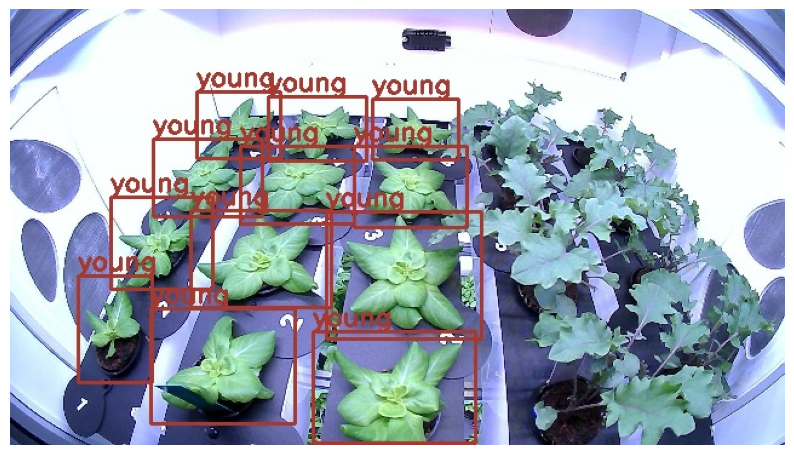

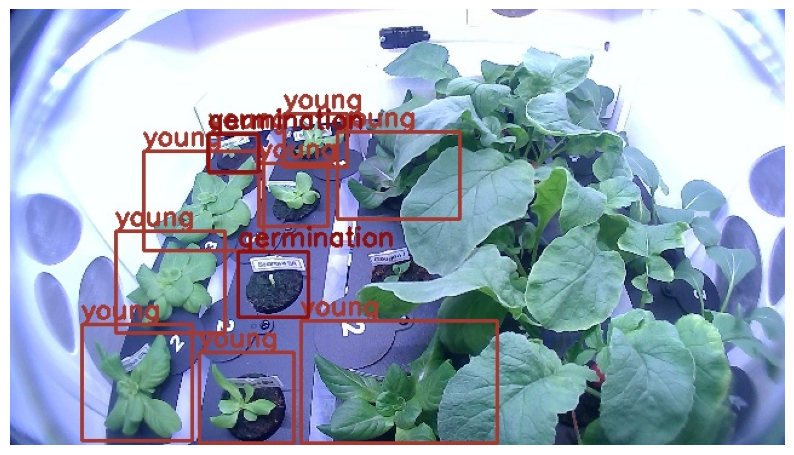

In [ ]:
validImages = glob.glob(f"{'outputs/training/lettuce'}/*.jpg")  # Specify the directory containing the model outputs

for i in range(2):
    plt.figure(figsize=(10, 7))
    image = plt.imread(validImages[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()

Display model evaluation

In [ ]:
!python ObjectDetection-FasterRCNN/eval.py --weights outputs/training/lettuce/best_model.pth --config data.yaml --model fasterrcnn_resnet50_fpn_v2 --verbose

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
  0% 0/29 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
100% 29/29 [00:45<00:00,  1.57s/it]


{'classes': tensor([1, 2, 3, 4, 5], dtype=torch.int32),
 'map': tensor(0.6415),
 'map_50': tensor(0.8902),
 'map_75': tensor(0.7819),
 'map_large': tensor(0.4473),
 'map_medium': tensor(0.6007),
 'map_per_class': tensor([0.4423, 

Display Model Performance Charts

Reading file: outputs/training/lettuce/train_loss_iter.png


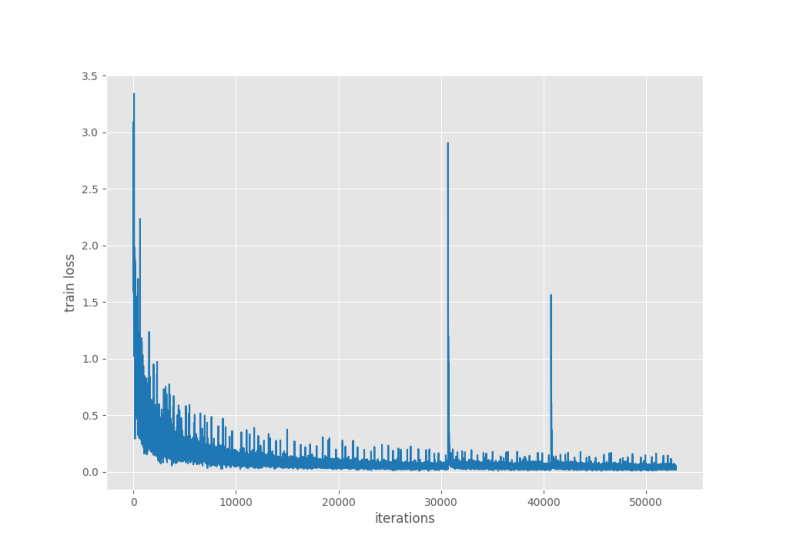

Reading file: outputs/training/lettuce/map.png


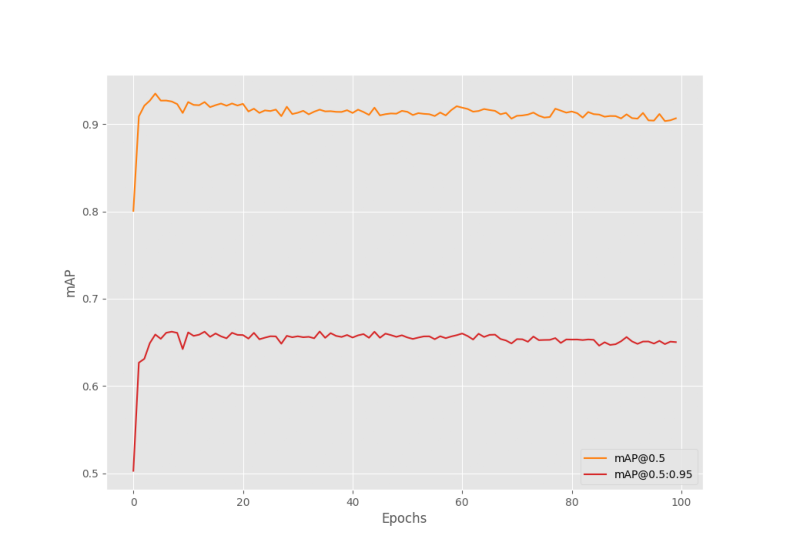

Reading file: outputs/training/lettuce/train_loss_bbox_reg.png


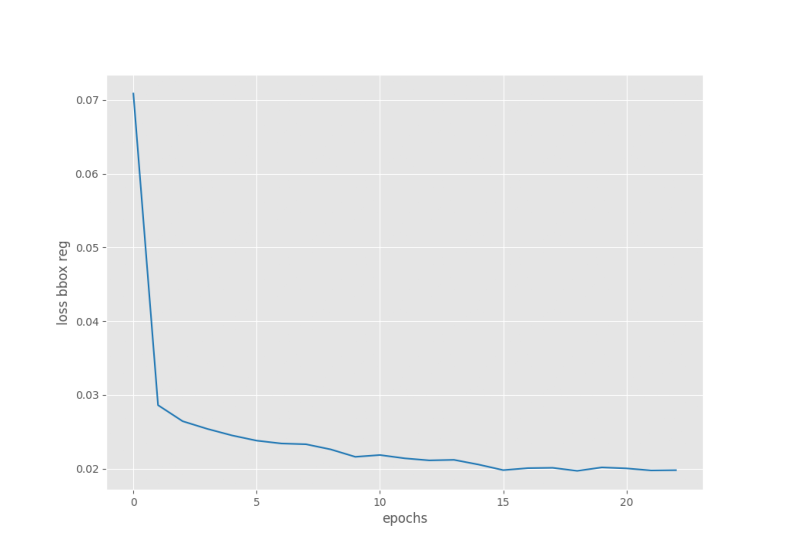

Reading file: outputs/training/lettuce/train_loss_epoch.png


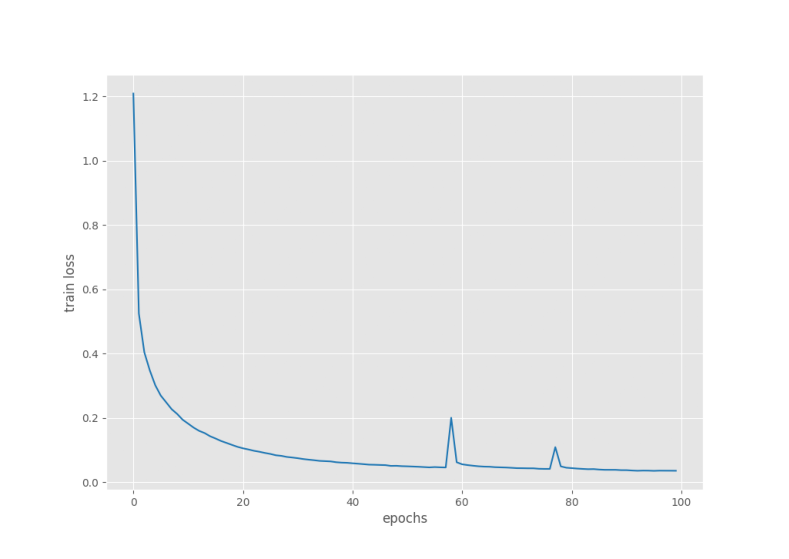

Reading file: outputs/training/lettuce/train_loss_cls.png


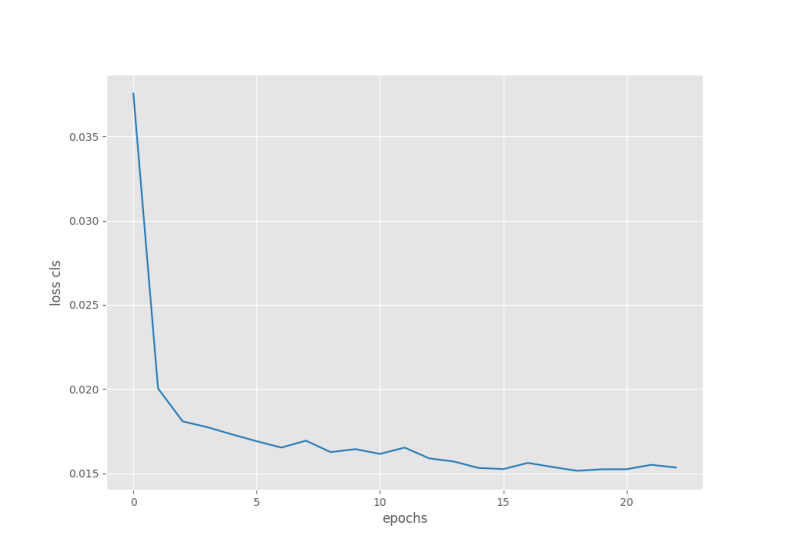

Reading file: outputs/training/lettuce/train_loss_obj.png


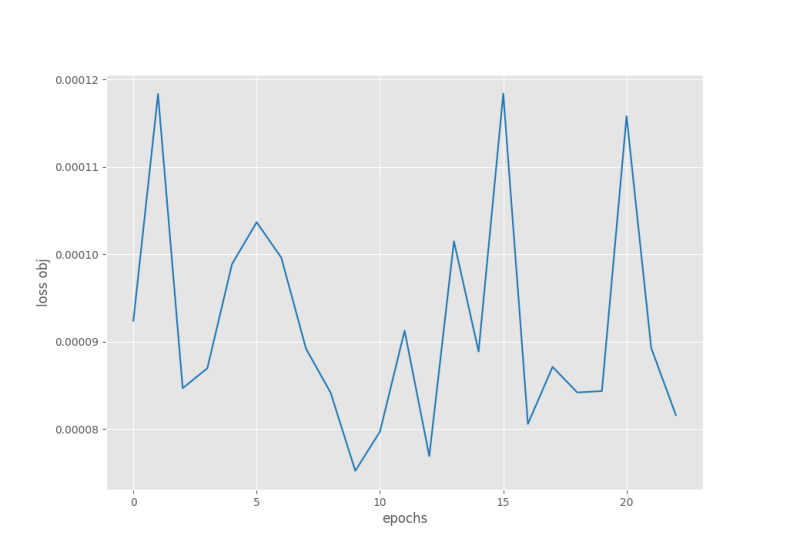

Reading file: outputs/training/lettuce/train_loss_rpn_bbox.png


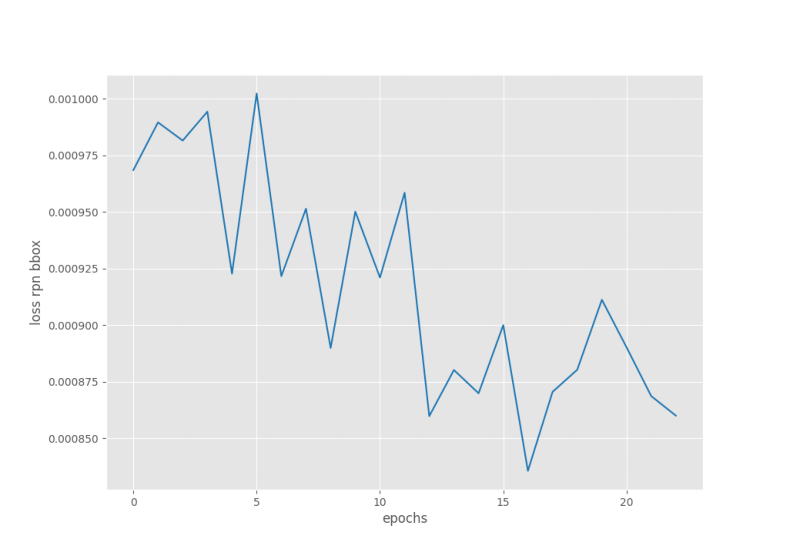

In [ ]:
modelPerformanceImages = glob.glob("outputs/training/lettuce/*.png") # Specify the directory containing the model outputs

# For each image in the file
for filename in modelPerformanceImages:
    print(f"Reading file: {filename}")  # Print the file name
    plt.figure(figsize=(10, 7))  # Set the figure size
    image = plt.imread(filename)  # Read the image
    plt.imshow(image)  # Display the image
    plt.axis('off')  # Hide the axes
    plt.show()  # Show the plot

Evaluate the model via inference on the testing data

In [7]:
!python ObjectDetection-FasterRCNN/inference.py --input test/100051.jpg --weights outputs/training/lettuce/best_model.pth

Building from model name arguments...
Test instances: 1
Image 1 done...
--------------------------------------------------
TEST PREDICTIONS COMPLETE
Average FPS: 0.541


In [ ]:
!python ObjectDetection-FasterRCNN/inference.py --input test/100071.jpg --weights outputs/training/lettuce/best_model.pth

Building from model name arguments...
Test instances: 1
Image 1 done...
--------------------------------------------------
TEST PREDICTIONS COMPLETE
Average FPS: 0.941


Visualise inference

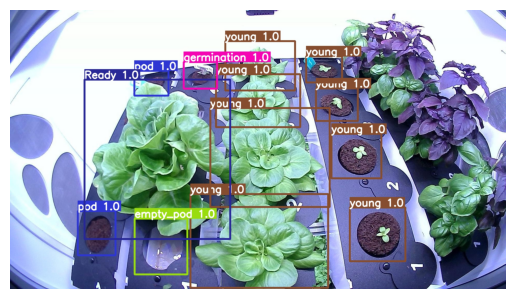

In [9]:
image = plt.imread('outputs/inference/res_2/100051.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

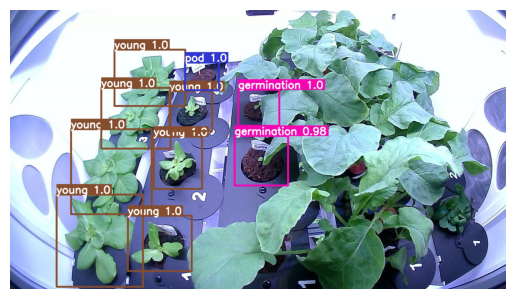

In [13]:
image = plt.imread('outputs/inference/res_3/100071.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()